In [180]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, truncnorm
plt.style.use('ggplot')

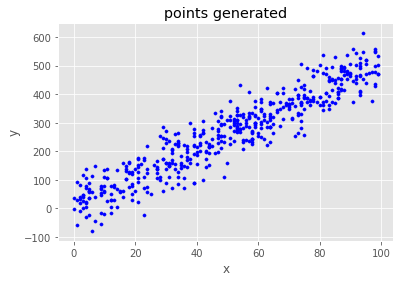

In [212]:
N = 500

b0 = 10
b1 = 5
x = np.random.randint(0, 100, N)

true_mu = b0 + b1*x
true_sigma = 50
y = norm(loc=true_mu, scale=true_sigma).rvs()

plt.scatter(x, y, color='blue', marker='o', s=10)
plt.xlabel('x')
plt.ylabel('y')
plt.title('points generated')
plt.show()

In [224]:
def accept(theta, theta_p):
    return np.sum(np.log(norm(loc=true_mu, scale=theta_p).pdf(y)) - np.log(norm(loc=true_mu, scale=theta).pdf(y)))

n_iter = 10000
trace = np.zeros(n_iter)
trace[0] = 20
acceptance_rate = np.zeros(n_iter)

for i in range(1, n_iter):
    theta = trace[i-1]
    theta_p = truncnorm(-theta/1, np.Inf, loc=theta, scale=5).rvs()
    alpha = accept(theta, theta_p)
    u = np.log(np.random.uniform())

    if u < alpha:
        trace[i] = theta_p
        acceptance_rate[i-1] = 1
    else:
        trace[i] = theta

50.36497765789989


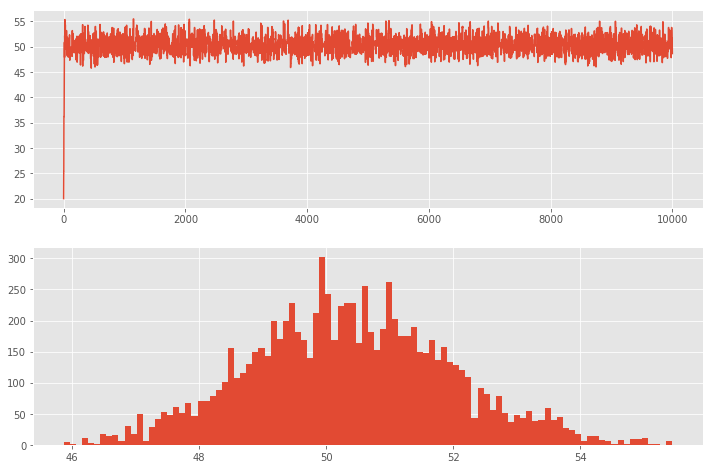

In [225]:
burn_in = 1000
print(trace[burn_in:].mean())
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(trace)
plt.subplot(2,1,2)
plt.hist(trace[burn_in:], bins=100)
plt.show()